# Econ 136 Problem Set 3 Question 2 The Return Profile and Risk of the S&P 500

### Import all the necessary Python libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot, dates
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm
from math import *
from scipy import stats

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

### We first need to read the SPY 500's price table 'SPY.csv' data from Yahoo Finance###

In [2]:
spy_price=pd.read_csv('SPY.csv')
spy_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.583992,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.773048,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.829773,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,27.113388,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,27.226835,531500


### Then read the dividend table 'SPY Dividend.csv' from Yahoo Finance as well ###

In [3]:
spy_dividend=pd.read_csv('SPY Dividend.csv')
spy_dividend.head()

,Date,Dividends
0,2011-12-16,0.770
1,2012-06-15,0.688
2,2016-09-16,1.082
3,1996-06-21,0.351
4,2017-03-17,1.033


### Transform the dates from string to numbers using the Matplotlib built-in object "dates", so that we can plot price vs date later

In [4]:
dates.datestr2num(spy_price['Date'])

array([727592., 727595., 727596., ..., 737315., 737318., 737319.])

## Part (a) Create a graph of the Close Price of SPY as a function of time##
### Step 1: Created a new dataframe which contains pandas dates, matplotlib dates object, and spy close prices
### Step 2: Wrote a formater function to change the format of date
### Step 3: Graph SPY Price Time Series by using the Seaborn.lineplot method

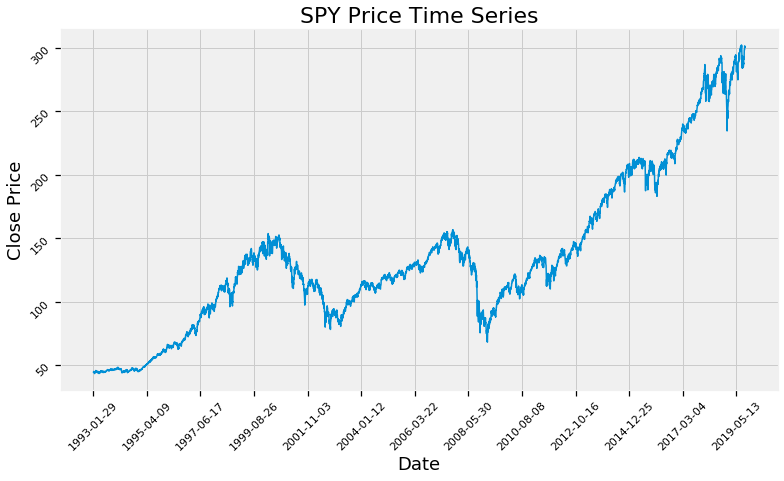

In [5]:
date=pd.to_datetime(spy_price['Date'])
datnum=dates.datestr2num(spy_price['Date'])
df = pd.DataFrame({
    'date': date,   # pandas dates
    'Date': datnum, # maptlotlib dates
    'Close Price': spy_price['Close']
})
def fake_dates(x, pos):
    """ Custom formater to turn floats into e.g., 2016-05-08"""
    return dates.num2date(x).strftime('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(11,6.79))
sns.lineplot('Date','Close Price',data=df)

ax.xaxis.set_major_formatter(FuncFormatter(fake_dates))
plt.title('SPY Price Time Series',fontsize=22)

ax.tick_params(labelrotation=45)
ax.set_ylabel('Close Price',fontsize=18)
ax.set_xlabel('Date',fontsize=18)
ax.set_xticks(np.arange(727592,737319,800))

fig.tight_layout();

## Part(b) Create a graph of the SPY returns as a function of time using the Close price and dividends

### Step 1: Merge the two tables by adding the Dividend column to the spy price table

In [6]:
joined_table=spy_price.merge(spy_dividend,how='outer',left_on='Date',right_on='Date')
joined_table.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.583992,1003200,NaN
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.773048,480500,NaN
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.829773,201300,NaN
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,27.113388,529400,NaN
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,27.226835,531500,NaN


### Step 2: I discovered that there are a lot of NaNs in the "Divideds" column. This is not helpful for calculation. Therefore, I used the "pandas.fillna (0 , inplace=True)" method to change the NaNs into 0s.

In [7]:
joined_table['Dividends'].fillna(0,inplace=True) #change the NaNs to 0s for calculation
joined_table.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.583992,1003200,0.0
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.773048,480500,0.0
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.829773,201300,0.0
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,27.113388,529400,0.0
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,27.226835,531500,0.0


### Step 3: Simplify this joined table by using the pandas. loc method to have just the date and close price column

In [8]:
simple_table=joined_table.loc[0:,['Date','Close']].set_index('Date')
simple_table.head()

,Close
Date,
1993-01-29,43.93750
1993-02-01,44.25000
1993-02-02,44.34375
1993-02-03,44.81250
1993-02-04,45.00000


### Step 4: Use the simplified table, we can find the difference between price of today and price of yesterday. I applied a lambda function to every row of the table

In [9]:
simple_tablev2=simple_table.apply(lambda x: np.array(x) - np.array(x.shift(1)))
simple_tablev2.reset_index(level=0, inplace=True)
simple_tablev2.rename(columns={'Close':'P(today)-P(yesterday)'},inplace=True)
simple_tablev2.head()

,Date,P(today)-P(yesterday)
0,1993-01-29,NaN
1,1993-02-01,0.31250
2,1993-02-02,0.09375
3,1993-02-03,0.46875
4,1993-02-04,0.18750


### Step 5: Merge the simple table version 2 with the Dividends column and form the simple table version 3

In [10]:
simple_tablev3=simple_tablev2.merge(spy_dividend,how='left',left_on='Date',right_on='Date')
simple_tablev3['Dividends'].fillna(0,inplace=True)
simple_tablev3['P(today)-P(yesterday)'].fillna(0,inplace=True)
simple_tablev3.head()

,Date,P(today)-P(yesterday),Dividends
0,1993-01-29,0.00000,0.0
1,1993-02-01,0.31250,0.0
2,1993-02-02,0.09375,0.0
3,1993-02-03,0.46875,0.0
4,1993-02-04,0.18750,0.0


### Step 6: Merge the simplified table version 3 with the Close column from the SPY 500 table. Now this simplified table version 4 is ready for the calculation of Returns. 

In [11]:
simple_tablev4=simple_tablev3.merge(simple_table,how='left',left_on='Date',right_on='Date')
simple_tablev4.head()

,Date,P(today)-P(yesterday),Dividends,Close
0,1993-01-29,0.00000,0.0,43.93750
1,1993-02-01,0.31250,0.0,44.25000
2,1993-02-02,0.09375,0.0,44.34375
3,1993-02-03,0.46875,0.0,44.81250
4,1993-02-04,0.18750,0.0,45.00000


### Step 7: Form the "Return %" column by summing the elements in price difference column and dividends column and then dividing by previous day’s close price

In [12]:
simple_tablev4['Return %']=(simple_tablev4['P(today)-P(yesterday)']+simple_tablev4['Dividends'])/simple_tablev4['Close'].shift(1)*100
simple_tablev4.head()

,Date,P(today)-P(yesterday),Dividends,Close,Return %
0,1993-01-29,0.00000,0.0,43.93750,NaN
1,1993-02-01,0.31250,0.0,44.25000,0.711238
2,1993-02-02,0.09375,0.0,44.34375,0.211864
3,1993-02-03,0.46875,0.0,44.81250,1.057082
4,1993-02-04,0.18750,0.0,45.00000,0.418410


### Step 8: We can now plot the "SPY Return Time Series". Similar to Part(a), we also need to change the format of the dates. Then we use the Seaborn.lineplot method again to plot.

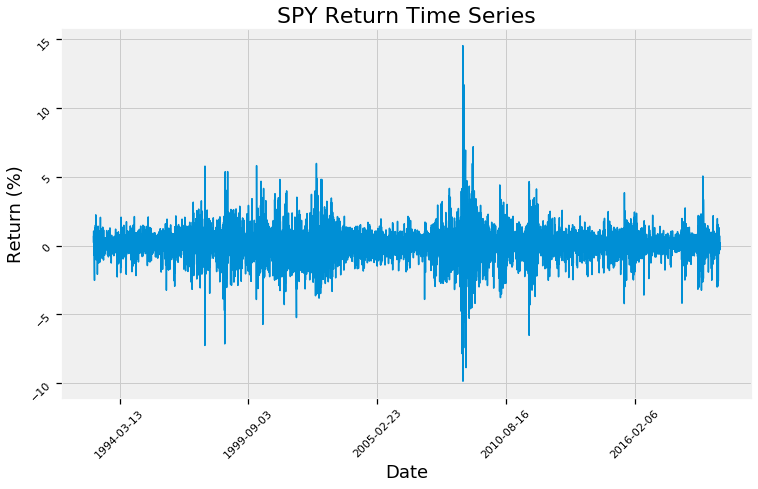

In [13]:
date1=pd.to_datetime(simple_tablev4['Date'])
datnum1=dates.datestr2num(simple_tablev4['Date'])
df1 = pd.DataFrame({
    'date': date,   # pandas dates
    'Date': datnum, # maptlotlib dates
    'Return': simple_tablev4['Return %']
})
def fake_dates(x, pos):
    """ Custom formater to turn floats into e.g., 2016-05-08"""
    return dates.num2date(x).strftime('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(11,6.79))
sns.lineplot('Date','Return',data=df1)

ax.xaxis.set_major_formatter(FuncFormatter(fake_dates))
plt.title('SPY Return Time Series',fontsize=22)

ax.tick_params(labelrotation=45)
ax.set_ylabel('Return (%)',fontsize=18)
ax.set_xlabel('Date',fontsize=18);


## Part(c) Create a Semi-Log graph of the cumulative distribution funciton (CDF and 1-CDF) of the SPY returns

### Step 1: Extract the "Return %" column out of the simple table version 4. Form a new table called sorted_return. We will build onto this new table in later parts. 

In [14]:
return_df = pd.DataFrame({'Return %':simple_tablev4['Return %']})
N=return_df.size
sorted_return=return_df.sort_values('Return %',ascending=True)
sorted_return.head()

,Return %
3958,-9.844768
3990,-8.857804
3946,-7.836161
3984,-7.423317
1199,-7.247340


### Step 2: Transform the "Return %" column into an array for easier calculation

In [15]:
return_array=sorted_return['Return %'].values
return_array

array([-9.84476835, -8.8578037 , -7.83616149, ..., 11.68553347,
       14.51977175,         nan])

### Step 3: Using the array above, we could form the CDF& 1-CDF column. Attach the columns to the sorted_return table

In [16]:
cdf_array=[]
for i in range(len(return_array)):
    if return_array[i]<0:
        cdf_array.append((i+1)/(N+1))
    else:
        cdf_array.append(1-((i+1)/(N+1)))

In [17]:
cdf_log_scale_array=np.log10(cdf_array)
cdf_log_scale_array

array([-3.82659305, -3.52556306, -3.3494718 , ..., -3.3494718 ,
       -3.52556306, -3.82659305])

In [18]:
sorted_return['CDF & 1-CDF']=cdf_array
sorted_return['CDFs in log10 Scale']=cdf_log_scale_array
sorted_return.head()

,Return %,CDF & 1-CDF,CDFs in log10 Scale
3958,-9.844768,0.000149,-3.826593
3990,-8.857804,0.000298,-3.525563
3946,-7.836161,0.000447,-3.349472
3984,-7.423317,0.000596,-3.224533
1199,-7.247340,0.000745,-3.127623


### Step 4: Use scatterplot to plot CDF, 1-CDF vs. Return and set y axis to log scale

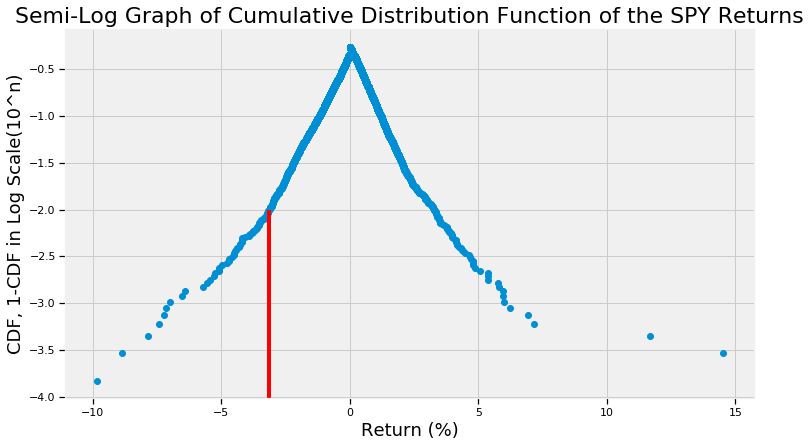

In [79]:
fig, ax = plt.subplots(figsize=(11,6.79))
plt.scatter(x=sorted_return['Return %'],y=sorted_return['CDFs in log10 Scale'])

plt.title('Semi-Log Graph of Cumulative Distribution Function of the SPY Returns',fontsize=22)

ax.axvline(x=-3.145466, ymax=0.51, color='r', linewidth=4)


ax.set_ylabel('CDF, 1-CDF in Log Scale(10^n)',fontsize=18)

ax.set_xlabel('Return (%)',fontsize=18);

In [73]:
sorted_return.loc[(sorted_return['CDFs in log10 Scale']>-2.01) & (sorted_return['CDFs in log10 Scale']<-1.98)].iloc[[0],:]

,Return %,CDF & 1-CDF,CDFs in log10 Scale,Norm CDF of Returns,Norm CDF of Returns in log10 Scale,ln[P(|r|>x)],|x|,ln(|x|)
4020,-3.145446,0.009839,-2.007049,0.002715,-2.566252,-4.621401,2.780368,1.022583


In [70]:
sorted_return.loc[(sorted_return['CDFs in log10 Scale']>-3.01) & (sorted_return['CDFs in log10 Scale']<-2.98)].iloc[[1],:]

,Return %,CDF & 1-CDF,CDFs in log10 Scale,Norm CDF of Returns,Norm CDF of Returns in log10 Scale,ln[P(|r|>x)],|x|,ln(|x|)
3961,6.007938,0.001044,-2.981495,9.843772e-08,-7.006838,-6.865146,5.202264,1.649094


## Part(d)Add a Gaussian distribution to the semi-log graph of the CDF of the SPY returns

### Step 1: Find the mean and standard deviation of the "Return" column

In [20]:
mean=np.mean(sorted_return['Return %'])
mean

0.042697794817150095

In [21]:
std=np.std(sorted_return['Return %'])
std

1.1466623795103048

### Step 2: Knwoing mean and standard deviation, we could find the Norm.dist and 1-Norm.dist of the returns. Put the results first in an array called normcdf_array

In [22]:
normcdf_array=[]
for i in range(len(return_array)):
    if return_array[i]<0:
        normcdf_array.append(norm.cdf(return_array[i],mean,std))
    else:
        normcdf_array.append(1-norm.cdf(return_array[i],mean,std))

### Step 3: Add two columns "Norm CDF of Returns", and "Norm CDF of Returns in log 10 Scale" to the sorted_return table and use the normcdf_array derived above.

In [23]:
sorted_return['Norm CDF of Returns'] = normcdf_array
sorted_return['Norm CDF of Returns in log10 Scale'] = np.log10(normcdf_array)
sorted_return.head()

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


,Return %,CDF & 1-CDF,CDFs in log10 Scale,Norm CDF of Returns,Norm CDF of Returns in log10 Scale
3958,-9.844768,0.000149,-3.826593,3.266184e-18,-17.485959
3990,-8.857804,0.000298,-3.525563,4.176913e-15,-14.379145
3946,-7.836161,0.000447,-3.349472,3.184902e-12,-11.496904
3984,-7.423317,0.000596,-3.224533,3.730536e-11,-10.428229
1199,-7.247340,0.000745,-3.127623,1.024550e-10,-9.989467


### Step 4: On the same plot, plot the subplot of the gaussian distributino using the "Return %" column and the "Norm CDF of Returns in log10 Scale" column. The y axis will be in log scale.

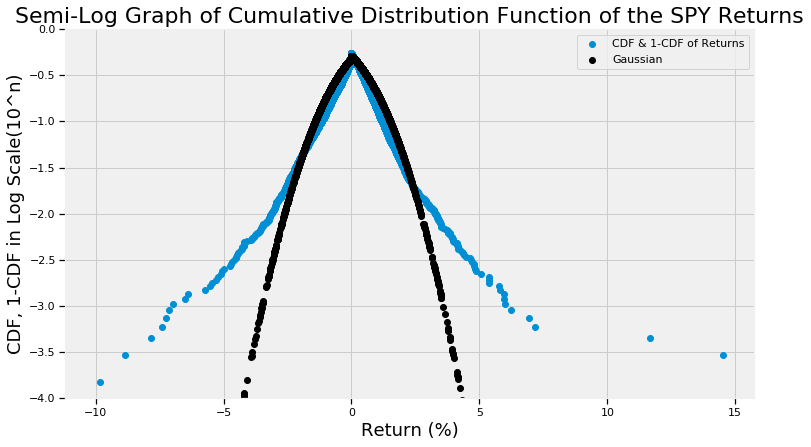

In [24]:
fig, ax = plt.subplots(figsize=(11,6.79))
plt.scatter(x=sorted_return['Return %'],y=sorted_return['CDFs in log10 Scale'],label='CDF & 1-CDF of Returns')
plt.scatter(x=sorted_return['Return %'],y=sorted_return['Norm CDF of Returns in log10 Scale'],color='black',label='Gaussian')
plt.title('Semi-Log Graph of Cumulative Distribution Function of the SPY Returns',fontsize=22)

ax.set_ylabel('CDF, 1-CDF in Log Scale(10^n)',fontsize=18)

ax.set_xlabel('Return (%)',fontsize=18);
ax.legend(loc='upper right')
plt.ylim(-4,0);

## Part(e) Calculate the power-law coeﬃcients in Eq. (41) of Gabaix’s article for the SPY ETF

### Step 1: To the sorted_return table, we add a new column called 'ln[P(|r|>x)]' by taking the log of CDF & 1-CDF column from the same table.

In [25]:
sorted_return['ln[P(|r|>x)]']=np.log(sorted_return['CDF & 1-CDF'])
sorted_return.head()

,Return %,CDF & 1-CDF,CDFs in log10 Scale,Norm CDF of Returns,Norm CDF of Returns in log10 Scale,ln[P(|r|>x)]
3958,-9.844768,0.000149,-3.826593,3.266184e-18,-17.485959,-8.811056
3990,-8.857804,0.000298,-3.525563,4.176913e-15,-14.379145,-8.117909
3946,-7.836161,0.000447,-3.349472,3.184902e-12,-11.496904,-7.712444
3984,-7.423317,0.000596,-3.224533,3.730536e-11,-10.428229,-7.424762
1199,-7.247340,0.000745,-3.127623,1.024550e-10,-9.989467,-7.201618


### Step 2: To the same sorted_return table, add "|x|"  by applying the normalizing formula provided in the problem set. Then add the "ln(|x|)" column by taking natural log of the |x| column elementwise.

In [26]:
r_array=sorted_return['Return %']
x_array=[]
for i in range(len(r_array)):
    x_array.append(np.abs((r_array.values[i]-mean))/std)
sorted_return['|x|']=x_array
sorted_return['ln(|x|)']=np.log(x_array)
sorted_return.head(20)

,Return %,CDF & 1-CDF,CDFs in log10 Scale,Norm CDF of Returns,Norm CDF of Returns in log10 Scale,ln[P(|r|>x)],|x|,ln(|x|)
3958,-9.844768,0.000149,-3.826593,3.266184e-18,-17.485959,-8.811056,8.622822,2.154412
3990,-8.857804,0.000298,-3.525563,4.176913e-15,-14.379145,-8.117909,7.762094,2.049252
3946,-7.836161,0.000447,-3.349472,3.184902e-12,-11.496904,-7.712444,6.871124,1.927328
3984,-7.423317,0.000596,-3.224533,3.730536e-11,-10.428229,-7.424762,6.511083,1.873506
1199,-7.247340,0.000745,-3.127623,1.024550e-10,-9.989467,-7.201618,6.357615,1.849653
1411,-7.134220,0.000894,-3.048442,1.937724e-10,-9.712708,-7.019297,6.258963,1.834015
3954,-6.983904,0.001044,-2.981495,4.453071e-10,-9.351340,-6.865146,6.127873,1.812848
4666,-6.512325,0.001193,-2.923503,5.433474e-09,-8.264922,-6.731615,5.716611,1.743376
3983,-6.407903,0.001342,-2.872351,9.246164e-09,-8.034038,-6.613832,5.625545,1.727318
1821,-5.719237,0.001491,-2.826593,2.517657e-07,-6.599003,-6.508471,5.024962,1.614418


### Step 3: Extract the columns needed for graphing and store into a new table called new_selected_table just for easier manipulation and better viewing

In [27]:
selected_table=sorted_return[['ln[P(|r|>x)]','|x|','ln(|x|)']]
new_selected_table=selected_table[selected_table['|x|']>2]
new_selected_table.head()

,ln[P(|r|>x)],|x|,ln(|x|)
3958,-8.811056,8.622822,2.154412
3990,-8.117909,7.762094,2.049252
3946,-7.712444,6.871124,1.927328
3984,-7.424762,6.511083,1.873506
1199,-7.201618,6.357615,1.849653


### Step 4: Plot the 'ln[P(|r|>x)]' vs 'ln(|x|) graph using a scatter plot.

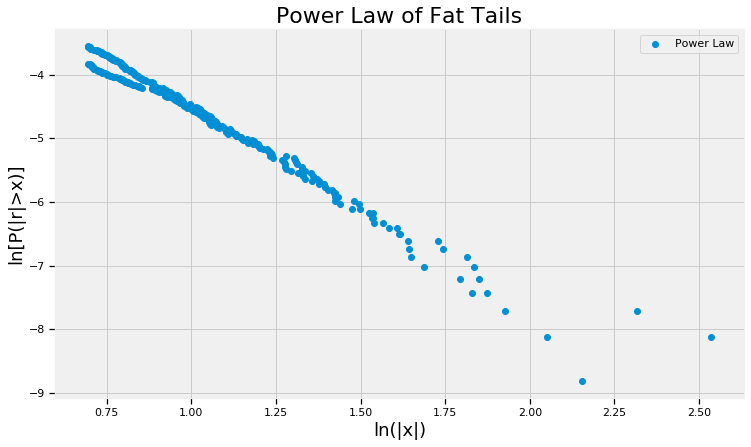

In [28]:
fig, ax = plt.subplots(figsize=(11,6.79))
plt.scatter(x=new_selected_table['ln(|x|)'],y=new_selected_table['ln[P(|r|>x)]'],label='Power Law')

plt.title('Power Law of Fat Tails',fontsize=22)

ax.set_ylabel('ln[P(|r|>x)]',fontsize=18)

ax.set_xlabel('ln(|x|)',fontsize=18);
ax.legend(loc='upper right');

### Step 5: Use the Scipy library to do a linear regression analysis and find the slope and intercept needed for graphing the trend line. 

In [29]:
slope, intercept, r_value, p_value, std_err = stats.linregress(new_selected_table['ln(|x|)'],
                                                               new_selected_table['ln[P(|r|>x)]'])

### Step 6: Add the trend line subplot to the Power Law of Fat Tails plot by using the Seaborn Regplot method. Then get the equation of the trendline

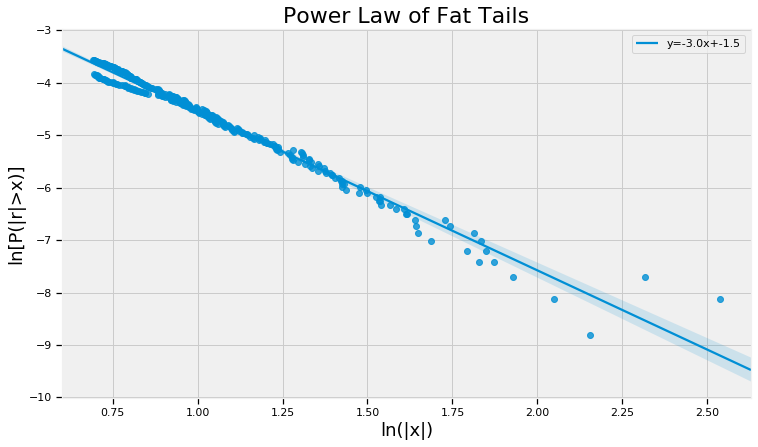

In [30]:
fig, ax = plt.subplots(figsize=(11,6.79))

sns.regplot(x='ln(|x|)',y='ln[P(|r|>x)]',data=new_selected_table, 
            line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

plt.title('Power Law of Fat Tails',fontsize=22)

ax.set_ylabel('ln[P(|r|>x)]',fontsize=18)

ax.legend()

ax.set_xlabel('ln(|x|)',fontsize=18);

### Step 7: Statistics Summary. Print out the Zeta r and R squared values for the last question of problem 2.

In [31]:
print("slope (Zeta r):", slope)
print ("r-squared:", r_value**2)

slope (Zeta r): -3.023655993444977
r-squared: 0.9794848331908175
